In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import iqr
from scipy.stats import scoreatpercentile as pct
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
import statsmodels.api as sm

<h2> Functions </h2>


In [2]:
#function to count nan values:
def nan_counter(df):
    remaining_nan = {}

    for column in df.columns:

        remaining_nan[column] = df[column][df[column].isna() == True].size

    return remaining_nan

In [3]:
# function to count zero values:
def zero_counter(df):
    zeros = {}

    for column in df.columns:

        zeros =(df==0).sum()

    return zeros

In [4]:
# Lets make a function to lowercase letters for columns
def column_name_lowercase (df_col):
    df_col.columns = df_col.columns.str.lower()
    return df_col

In [5]:
# function to drop the column
def drop_col(df, col):
    df.drop(columns=[col], inplace=True)
    return df

In [6]:
# function to fill na with mean
def fill_na_with_mean (df_col):
    df_col.fillna(np.mean(df_col), inplace=True)
    return df_col

<h2> Import Data </h2>

In [7]:
dataframe=pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

<h2> Clean Data </h2>

<h4> Lower case all data </h4>

In [9]:
dataframe = dataframe.applymap(lambda s:s.lower() if type(s) == str else s)

In [10]:
column_name_lowercase(dataframe)

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,dk49336,arizona,4809.216960,no,basic,college,2/18/11,employed,m,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,1,kx64629,california,2228.525238,no,basic,college,1/18/11,unemployed,f,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,2,lz68649,washington,14947.917300,no,basic,bachelor,2/10/11,employed,m,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,a
3,3,xl78013,oregon,22332.439460,yes,extended,college,1/11/11,employed,m,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,a
4,4,qa50777,oregon,9025.067525,no,premium,bachelor,1/17/11,medical leave,f,...,NaN,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,fe99816,nevada,15563.369440,no,premium,bachelor,1/19/11,unemployed,f,...,NaN,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,a
10906,10906,kx53892,oregon,5259.444853,no,basic,college,1/6/11,employed,f,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,a
10907,10907,tl39050,arizona,23893.304100,no,extended,bachelor,2/6/11,employed,f,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN
10908,10908,wa60547,california,11971.977650,no,premium,college,2/13/11,employed,f,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,a


In [11]:
drop_col(dataframe, 'unnamed: 0')

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,dk49336,arizona,4809.216960,no,basic,college,2/18/11,employed,m,48029,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,kx64629,california,2228.525238,no,basic,college,1/18/11,unemployed,f,0,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,lz68649,washington,14947.917300,no,basic,bachelor,2/10/11,employed,m,22139,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,a
3,xl78013,oregon,22332.439460,yes,extended,college,1/11/11,employed,m,49078,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,a
4,qa50777,oregon,9025.067525,no,premium,bachelor,1/17/11,medical leave,f,23675,...,NaN,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,fe99816,nevada,15563.369440,no,premium,bachelor,1/19/11,unemployed,f,0,...,NaN,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,a
10906,kx53892,oregon,5259.444853,no,basic,college,1/6/11,employed,f,61146,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,a
10907,tl39050,arizona,23893.304100,no,extended,bachelor,2/6/11,employed,f,39837,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN
10908,wa60547,california,11971.977650,no,premium,college,2/13/11,employed,f,64195,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,a


<h4> Dropping useless columns </h4>

In [12]:
drop_col(dataframe, 'customer')

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,arizona,4809.216960,no,basic,college,2/18/11,employed,m,48029,suburban,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,california,2228.525238,no,basic,college,1/18/11,unemployed,f,0,suburban,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,washington,14947.917300,no,basic,bachelor,2/10/11,employed,m,22139,suburban,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,a
3,oregon,22332.439460,yes,extended,college,1/11/11,employed,m,49078,suburban,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,a
4,oregon,9025.067525,no,premium,bachelor,1/17/11,medical leave,f,23675,suburban,...,NaN,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,no,premium,bachelor,1/19/11,unemployed,f,0,suburban,...,NaN,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,a
10906,oregon,5259.444853,no,basic,college,1/6/11,employed,f,61146,urban,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,a
10907,arizona,23893.304100,no,extended,bachelor,2/6/11,employed,f,39837,rural,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN
10908,california,11971.977650,no,premium,college,2/13/11,employed,f,64195,urban,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,a


In [13]:
drop_col(dataframe, 'effective to date')

,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,marital status,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,arizona,4809.216960,no,basic,college,employed,m,48029,suburban,married,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,california,2228.525238,no,basic,college,unemployed,f,0,suburban,single,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,washington,14947.917300,no,basic,bachelor,employed,m,22139,suburban,single,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,a
3,oregon,22332.439460,yes,extended,college,employed,m,49078,suburban,single,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,a
4,oregon,9025.067525,no,premium,bachelor,medical leave,f,23675,suburban,married,...,NaN,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,no,premium,bachelor,unemployed,f,0,suburban,married,...,NaN,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,a
10906,oregon,5259.444853,no,basic,college,employed,f,61146,urban,married,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,a
10907,arizona,23893.304100,no,extended,bachelor,employed,f,39837,rural,married,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN
10908,california,11971.977650,no,premium,college,employed,f,64195,urban,divorced,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,a


In [14]:
dataframe['gender'].value_counts(dropna=False)

f    5573
m    5337
Name: gender, dtype: int64

<h4> Converting float to integers </h4>

In [15]:
print("----:::::columns with counted zero values::::----\n", zero_counter(dataframe))
print("\n columns with NaN values: ")
print(nan_counter(dataframe))

----:::::columns with counted zero values::::----
 state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
employmentstatus                    0
gender                              0
income                           2787
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           354
months since policy inception     107
number of open complaints        8160
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                       0
vehicle size                        0
vehicle type                        0
dtype: int64

 columns with NaN values: 
{'state': 631, 'customer lifetime 

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10279 non-null  object 
 1   customer lifetime value        10910 non-null  float64
 2   response                       10279 non-null  object 
 3   coverage                       10910 non-null  object 
 4   education                      10910 non-null  object 
 5   employmentstatus               10910 non-null  object 
 6   gender                         10910 non-null  object 
 7   income                         10910 non-null  int64  
 8   location code                  10910 non-null  object 
 9   marital status                 10910 non-null  object 
 10  monthly premium auto           10910 non-null  int64  
 11  months since last claim        10277 non-null  float64
 12  months since policy inception  10910 non-null 

In [17]:
#dropping duplicates
dataframe = dataframe.drop_duplicates()

In [18]:
# counting na values in the columns
dataframe['number of open complaints'].isna().sum()

623

In [19]:
# replacing na values to 0, assuming 'empty values == no complaints'
dataframe['number of open complaints'].fillna(0, inplace=True)

C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
# dealing with Income --> too many zero values so replacing with average income

In [21]:
dataframe['income']=dataframe['income'].replace(0, np.mean(dataframe['income'] ))

C:\Users\Seinf\AppData\Local\Temp/ipykernel_8948/581226740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['income']=dataframe['income'].replace(0, np.mean(dataframe['income'] ))


In [22]:
dataframe['state'].value_counts(dropna=False)

california    3512
oregon        2861
arizona       1918
nevada         987
washington     885
NaN            613
Name: state, dtype: int64

In [23]:
#filling na values to 'no' assuming the answer is negative
dataframe['response'].fillna('no', inplace=True)

In [24]:
dataframe['months since last claim'].describe()

count    10153.000000
mean        15.146952
std         10.077628
min          0.000000
25%          6.000000
50%         14.000000
75%         23.000000
max         35.000000
Name: months since last claim, dtype: float64

In [25]:
#filling na values with mean
fill_na_with_mean(dataframe['months since last claim'])

0         7.000000
1         3.000000
2        34.000000
3        10.000000
4        15.146952
           ...    
10905    15.146952
10906     7.000000
10907    11.000000
10908     0.000000
10909    31.000000
Name: months since last claim, Length: 10776, dtype: float64

In [26]:

dataframe['customer lifetime value']  = dataframe['customer lifetime value'].astype(int)

C:\Users\Seinf\AppData\Local\Temp/ipykernel_8948/2708021418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['customer lifetime value']  = dataframe['customer lifetime value'].astype(int)


In [27]:
dataframe['months since last claim'] = dataframe['months since last claim'].astype(int)

C:\Users\Seinf\AppData\Local\Temp/ipykernel_8948/3219454365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['months since last claim'] = dataframe['months since last claim'].astype(int)


In [28]:
dataframe['total claim amount']  = dataframe['total claim amount'].astype(int)

C:\Users\Seinf\AppData\Local\Temp/ipykernel_8948/2056619215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['total claim amount']  = dataframe['total claim amount'].astype(int)


In [29]:
dataframe['income']  = dataframe['income'].astype(int)

C:\Users\Seinf\AppData\Local\Temp/ipykernel_8948/1331061170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['income']  = dataframe['income'].astype(int)


In [30]:
dataframe['number of open complaints']  = dataframe['number of open complaints'].astype(int)

C:\Users\Seinf\AppData\Local\Temp/ipykernel_8948/415027402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['number of open complaints']  = dataframe['number of open complaints'].astype(int)


In [31]:
dataframe['vehicle type'].value_counts(dropna=False)

NaN    5416
a      5360
Name: vehicle type, dtype: int64

In [32]:
dataframe['vehicle type'].describe()

count     5360
unique       1
top          a
freq      5360
Name: vehicle type, dtype: object

In [33]:
#vehivle type tpp many NaN values and the rest values == 'a', does not make much sense so the column is dropped
drop_col(dataframe,'vehicle type')

C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,marital status,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,arizona,4809,no,basic,college,employed,m,48029,suburban,married,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,california,2228,no,basic,college,unemployed,f,37543,suburban,single,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,washington,14947,no,basic,bachelor,employed,m,22139,suburban,single,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,oregon,22332,yes,extended,college,employed,m,49078,suburban,single,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,oregon,9025,no,premium,bachelor,medical leave,f,23675,suburban,married,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563,no,premium,bachelor,unemployed,f,37543,suburban,married,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10906,oregon,5259,no,basic,college,employed,f,61146,urban,married,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10907,arizona,23893,no,extended,bachelor,employed,f,39837,rural,married,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10908,california,11971,no,premium,college,employed,f,64195,urban,divorced,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [34]:
print(nan_counter(dataframe))

{'state': 613, 'customer lifetime value': 0, 'response': 0, 'coverage': 0, 'education': 0, 'employmentstatus': 0, 'gender': 0, 'income': 0, 'location code': 0, 'marital status': 0, 'monthly premium auto': 0, 'months since last claim': 0, 'months since policy inception': 0, 'number of open complaints': 0, 'number of policies': 0, 'policy type': 0, 'policy': 0, 'renew offer type': 0, 'sales channel': 0, 'total claim amount': 0, 'vehicle class': 608, 'vehicle size': 608}


In [35]:
dataframe['vehicle class'].value_counts()

four-door car    5151
two-door car     2093
suv              1992
sports car        540
luxury suv        205
luxury car        187
Name: vehicle class, dtype: int64

In [36]:
#dropping the rest of the na values
dataframe.dropna(inplace = True)

C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [37]:
dataframe

,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,marital status,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,arizona,4809,no,basic,college,employed,m,48029,suburban,married,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,california,2228,no,basic,college,unemployed,f,37543,suburban,single,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,washington,14947,no,basic,bachelor,employed,m,22139,suburban,single,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,oregon,22332,yes,extended,college,employed,m,49078,suburban,single,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,oregon,9025,no,premium,bachelor,medical leave,f,23675,suburban,married,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,nevada,19228,no,basic,high school or below,unemployed,m,37543,suburban,single,...,32,0,2,personal auto,personal l2,offer1,branch,897,luxury suv,medsize
10905,nevada,15563,no,premium,bachelor,unemployed,f,37543,suburban,married,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10906,oregon,5259,no,basic,college,employed,f,61146,urban,married,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10907,arizona,23893,no,extended,bachelor,employed,f,39837,rural,married,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize


In [38]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9584 entries, 0 to 10908
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   state                          9584 non-null   object
 1   customer lifetime value        9584 non-null   int32 
 2   response                       9584 non-null   object
 3   coverage                       9584 non-null   object
 4   education                      9584 non-null   object
 5   employmentstatus               9584 non-null   object
 6   gender                         9584 non-null   object
 7   income                         9584 non-null   int32 
 8   location code                  9584 non-null   object
 9   marital status                 9584 non-null   object
 10  monthly premium auto           9584 non-null   int64 
 11  months since last claim        9584 non-null   int32 
 12  months since policy inception  9584 non-null   int64 
 13  nu

<h2> Next -- > x/y split or categ to numerical split standardizing the data?

1.xy split ; test train split -> split num and categ for train and test . Scale numerical ones -> encode categoricals also twice
--> concat(x,y) train and concat(x,y) test and then model. 

<h2> X y Split </h2>

In [39]:
# separating dependant variable (y) from independant variables X

In [40]:
X = dataframe.drop("total claim amount", axis=1)
y = dataframe["total claim amount"]

In [41]:
# separating into categorical and nummerical

In [42]:
X_num = X._get_numeric_data()
X_cat = X.select_dtypes("object")

In [43]:
X_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809,48029,61,7,52,0,9
1,2228,37543,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,15,31,0,7
...,...,...,...,...,...,...,...
10904,19228,37543,187,14,32,0,2
10905,15563,37543,253,15,40,0,7
10906,5259,61146,65,7,68,0,6
10907,23893,39837,201,11,63,0,2


In [44]:
# dropping categorical columns
X_num.drop(columns=['number of open complaints', 'number of policies' ], inplace = True)

In [45]:
# adding them to categoricals
X_cat['number of open complaints'] = dataframe['number of open complaints']

C:\Users\Seinf\AppData\Local\Temp/ipykernel_8948/4004277739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['number of open complaints'] = dataframe['number of open complaints']


In [46]:
X_cat['number of policies'] = dataframe['number of policies']

C:\Users\Seinf\AppData\Local\Temp/ipykernel_8948/1081319113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['number of policies'] = dataframe['number of policies']


In [47]:
X_cat['policy type'].value_counts()

personal auto     7119
corporate auto    2072
special auto       393
Name: policy type, dtype: int64

In [48]:
X_cat=pd.get_dummies(X_cat, drop_first=True)

In [49]:
X_cat

,number of open complaints,number of policies,state_california,state_nevada,state_oregon,state_washington,response_yes,coverage_extended,coverage_premium,education_college,...,sales channel_branch,sales channel_call center,sales channel_web,vehicle class_luxury car,vehicle class_luxury suv,vehicle class_sports car,vehicle class_suv,vehicle class_two-door car,vehicle size_medsize,vehicle size_small
0,0,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,2,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,2,0,0,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,7,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,0,2,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
10905,0,7,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
10906,0,6,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
10907,0,2,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [50]:
X_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception
0,4809,48029,61,7,52
1,2228,37543,64,3,26
2,14947,22139,100,34,31
3,22332,49078,97,10,3
4,9025,23675,117,15,31
...,...,...,...,...,...
10904,19228,37543,187,14,32
10905,15563,37543,253,15,40
10906,5259,61146,65,7,68
10907,23893,39837,201,11,63


In [51]:
# standardizing values according to x y axis
# X_num_minmax = pd.DataFrame(MinMaxScaler().fit_transform(X_num), columns=X_num.columns)
# X_num_minmax

In [52]:
X = pd.concat([X_cat,X_num], axis=1)

In [53]:
X

,number of open complaints,number of policies,state_california,state_nevada,state_oregon,state_washington,response_yes,coverage_extended,coverage_premium,education_college,...,vehicle class_sports car,vehicle class_suv,vehicle class_two-door car,vehicle size_medsize,vehicle size_small,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception
0,0,9,0,0,0,0,0,0,0,1,...,0,0,0,1,0,4809,48029,61,7,52
1,0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,2228,37543,64,3,26
2,0,2,0,0,0,1,0,0,0,0,...,0,1,0,1,0,14947,22139,100,34,31
3,0,2,0,0,1,0,1,1,0,1,...,0,0,0,1,0,22332,49078,97,10,3
4,0,7,0,0,1,0,0,0,1,0,...,0,0,0,1,0,9025,23675,117,15,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,0,2,0,1,0,0,0,0,0,0,...,0,0,0,1,0,19228,37543,187,14,32
10905,0,7,0,1,0,0,0,0,1,0,...,0,0,0,1,0,15563,37543,253,15,40
10906,0,6,0,0,1,0,0,0,0,1,...,0,0,0,1,0,5259,61146,65,7,68
10907,0,2,0,0,0,0,0,1,0,0,...,0,0,0,1,0,23893,39837,201,11,63


<h3> Data splitting for training and testing </h3>

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=150)

std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)

In [55]:
X_test_scaled=std_scaler.transform(X_test)

In [56]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

In [57]:
model.intercept_

433.34323171907596

In [58]:
model.coef_

array([-9.90095984e-01,  3.00624819e+00,  3.37076840e+00, -1.04159538e+00,
       -6.83117904e-01,  2.33278543e+00, -7.22664601e+00, -6.16663600e+00,
       -1.29700215e+00, -3.28777755e+00, -2.92558425e+00,  2.89175886e+00,
       -1.96913674e+00, -4.86891869e+00,  2.69468526e+00, -1.27489334e+00,
        3.25717346e+01,  7.71299395e+00,  1.81931540e+02,  8.40470231e+01,
       -3.77419451e+00,  2.80015330e+01, -1.04931555e+13, -1.43485079e+14,
       -1.70883572e+00,  7.96116424e-01,  8.14525243e+12,  1.01345246e+13,
        1.16317265e+13,  6.53638689e+13,  9.61753739e+13,  8.73229364e+13,
        1.05484196e+01,  4.41596482e+00,  4.43012752e+00,  8.26292879e-01,
        1.07927259e-01,  1.09949598e+00,  4.61819003e+00,  9.41169779e-01,
       -4.48195706e+00, -3.70636632e+00,  6.38264272e-01, -1.93793794e+00,
        1.09872729e+00, -2.47973197e+00, -7.80578832e+00,  1.75737218e+02,
        3.20759058e+00, -1.24476807e+00])

In [59]:
R2 = model.score(X_test_scaled, y_test)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.7619688191625283
0.7568935274602369


In [60]:
R2 = model.score(X_train_scaled, y_train)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.7745833311283145
0.7697770055660184


In [61]:
y_pred=model.predict(X_test_scaled)

In [62]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
598,246,189.430320
6458,2,-21.887361
7450,460,539.085354
826,551,439.841118
3643,1201,668.764341
...,...,...
5013,1008,1150.378295
8561,830,943.677959
1894,16,18.353072
9011,525,404.807567


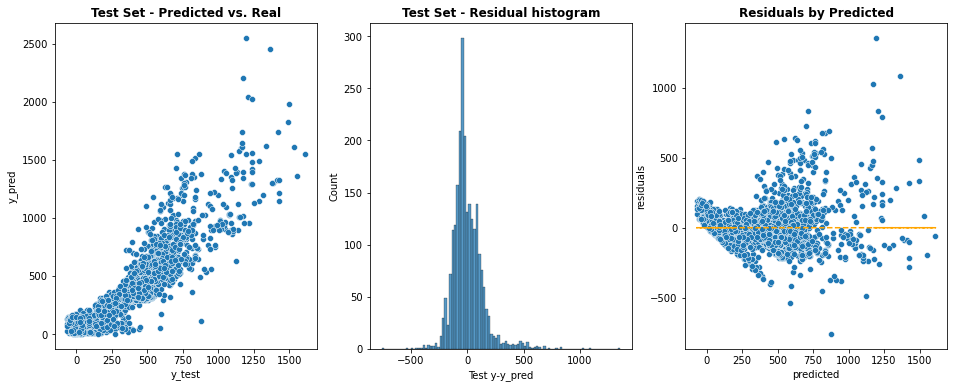

In [63]:
#checking correlation, distribution and errors
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=y_pred, y=y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(y_test-y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = y_pred,y = y_test - y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed', color='orange')

In [66]:
#model validation 

In [67]:
MSE = mse(y_test,y_pred)
MAE = mae(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(MSE)
print(MAE)
print(RMSE)

20947.643608144313
99.55193712330309
144.7330080118019


In [68]:
#Feature Importance (least important features on top because we wanted to decide if we should delete some columns)

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=True)

In [69]:
features_importances

,Attribute,Importance
36,sales channel_call center,1.079273e-01
42,vehicle class_two-door car,6.382643e-01
4,state_oregon,6.831179e-01
25,policy_corporate l3,7.961164e-01
35,sales channel_branch,8.262929e-01
39,vehicle class_luxury suv,9.411698e-01
0,number of open complaints,9.900960e-01
3,state_nevada,1.041595e+00
44,vehicle size_small,1.098727e+00
37,sales channel_web,1.099496e+00
